In [1]:
from sympy import *
from fractions import Fraction
from scipy.stats import binom
from scipy.stats import poisson
from scipy.stats import hypergeom
from scipy.stats import nbinom
from scipy.stats import expon
from scipy.stats import norm
from IPython.display import display, Latex, HTML, Math
import statsmodels.api as sm
from scipy import stats
import numpy as np
import sympy as sp
import math as math
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline
x, y, z, u, c = symbols('x y z u c')
init_printing()

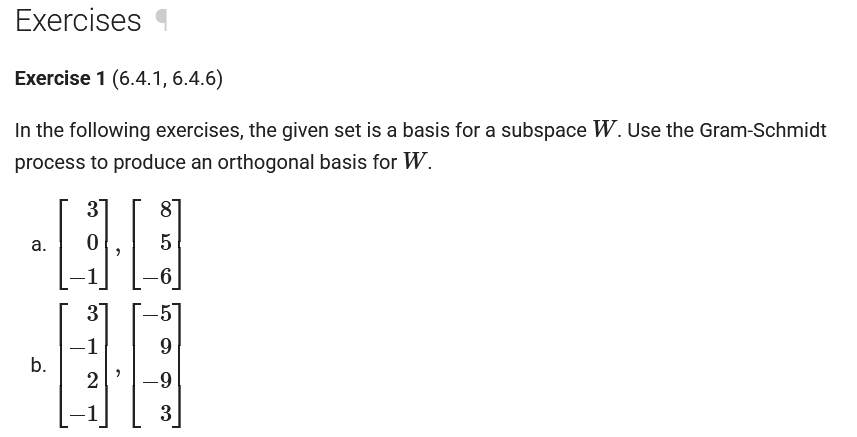

In [2]:
##6.4.1
u1 = Matrix(([3], [0], [-1]))
u2 = Matrix(([8],[5], [-6]))

v1 = u1
v2 = u2 - u2.project(v1)
print(v1,v2)

Matrix([[3], [0], [-1]]) Matrix([[-1], [5], [-3]])


In [3]:
##6.4.6
u1 = Matrix(([3],[-1],[2],[-1]))
u2 = Matrix(([-5],[9],[-9],[3]))

v1 = u1
v2 = u2 - u2.project(v1)
print(v1,v2)

Matrix([[3], [-1], [2], [-1]]) Matrix([[4], [6], [-3], [0]])


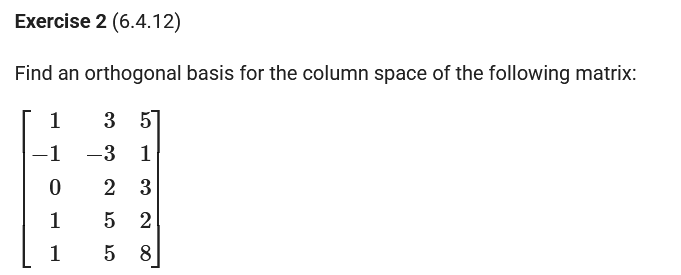

In [4]:
##6.4.12
u1 = Matrix(([1],[-1],[0],[1],[1]))
u2 = Matrix(([3], [-3],[2],[5],[5]))
u3 = Matrix(([5],[1],[3],[2],[8]))

v1 = u1
v2 = u2 - u2.project(v1)
v3 = u3 - u3.project(v2) - u3.project(v1)
print(v1,v2,v3)

Matrix([[1], [-1], [0], [1], [1]]) Matrix([[-1], [1], [2], [1], [1]]) Matrix([[3], [3], [0], [-3], [3]])


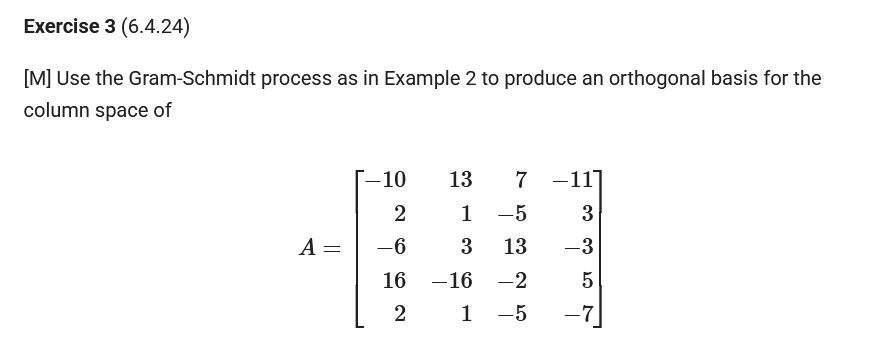

In [5]:
##6.4.24
u1 = Matrix(([-10],[2],[-6],[16],[2]))
u2 = Matrix(([13], [1],[3],[-16],[1]))
u3 = Matrix(([7],[-5],[13],[-2],[-5]))
u4 = Matrix(([-11],[3],[-3], [5], [-7]))

v1 = u1
v2 = u2 - u2.project(v1)
v3 = u3 - u3.project(v2) - u3.project(v1)
v4 = u4 - u4.project(v3) - u4.project(v2) - u4.project(v1)
print(v1,v2,v3,v4)


Matrix([[-10], [2], [-6], [16], [2]]) Matrix([[3], [3], [-3], [0], [3]]) Matrix([[6], [0], [6], [6], [0]]) Matrix([[0], [5], [0], [0], [-5]])


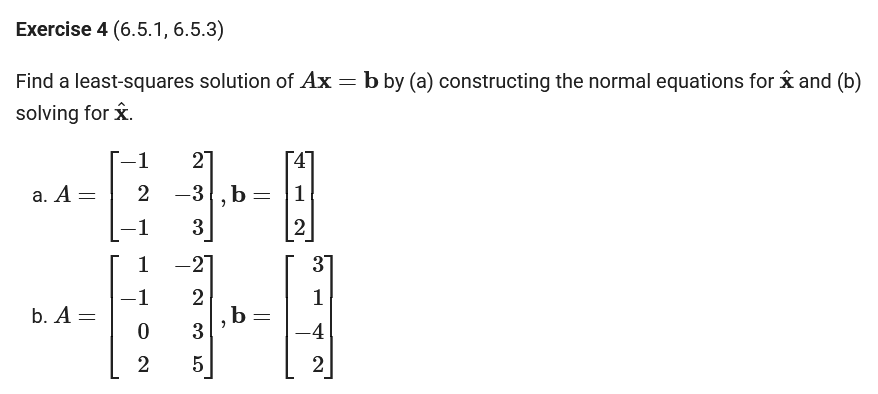

In [8]:
# 6.5.1
A = Matrix(([-1,2],[2,-3],[-1,3]))
b = Matrix(([4],[1],[2]))

print(A.T*A)
print(A.T*b)
print(Matrix.hstack(A.T*A,A.T*b).rref())    



Matrix([[6, -11], [-11, 22]])
Matrix([[-4], [11]])
(Matrix([
[1, 0, 3],
[0, 1, 2]]), (0, 1))


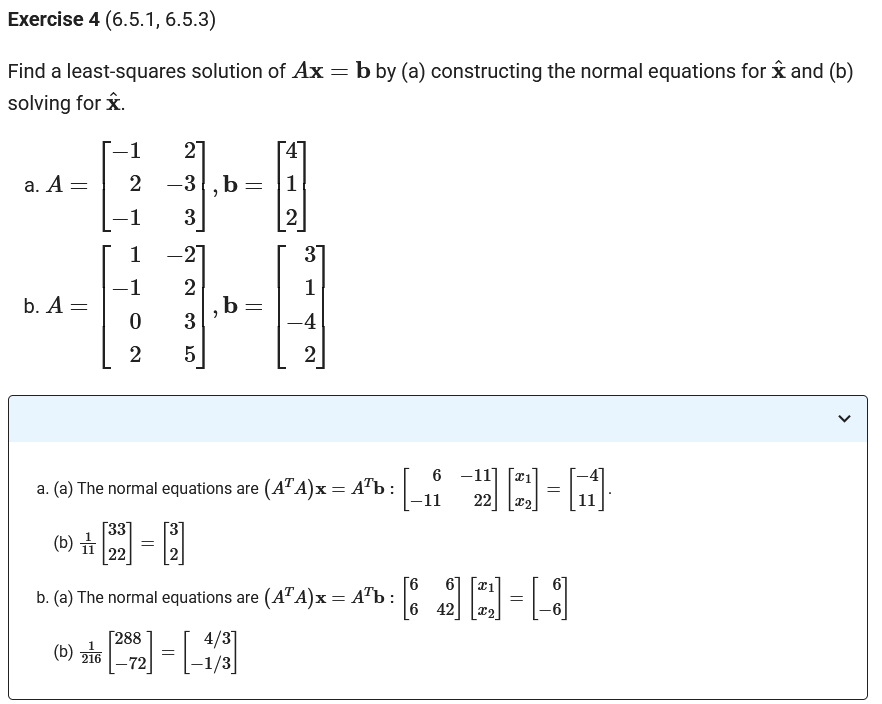

In [9]:
##6.5.3
A = Matrix(([1,-2],[-1,2],[0,3],[2,5]))
b = Matrix(([3],[1],[-4],[2]))

print(A.T*A)
print(A.T*b)
print(Matrix.hstack(A.T*A,A.T*b).rref())

Matrix([[6, 6], [6, 42]])
Matrix([[6], [-6]])
(Matrix([
[1, 0,  4/3],
[0, 1, -1/3]]), (0, 1))


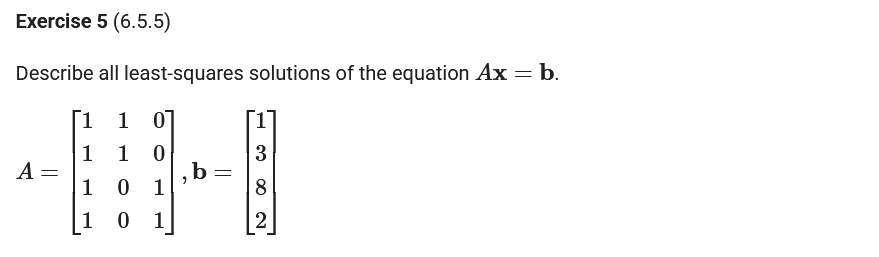

In [10]:
##6.5.5
A = Matrix(([1,1,0],[1,1,0],[1,0,1],[1,0,1]))
b = Matrix(([1],[3],[8],[2]))
print(Matrix.hstack(A.T*A,A.T*b).rref())

(Matrix([
[1, 0,  1,  5],
[0, 1, -1, -3],
[0, 0,  0,  0]]), (0, 1))


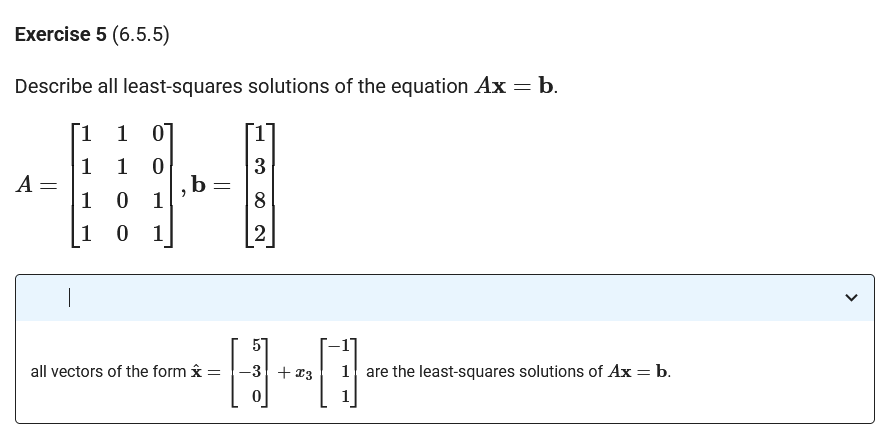

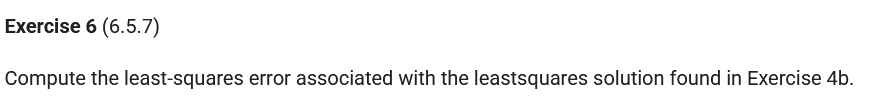

In [ ]:
#6.5.7
# Step 1: Define symbolic variables
x1, x2 = sp.symbols('x1 x2')

# Step 2: Define matrix A and vector b
A = sp.Matrix([
    [1, -2],
    [-1, 2],
    [0, 3],
    [2, 5]
])
b = sp.Matrix([3, 1, -4, 2])

# Step 3: Compute normal equations: A^T A x = A^T b
ATA = A.T * A
ATb = A.T * b

# Step 4: Solve for x̂
x_hat = ATA.inv() * ATb

# Step 5: Compute the residual and error norm
residual = A * x_hat - b
error = sp.sqrt(residual.dot(residual))

# Display results
sp.pprint(x_hat, use_unicode=True)
sp.pprint(error.simplify(), use_unicode=True)


⎡4/3 ⎤
⎢    ⎥
⎣-1/3⎦
2⋅√5


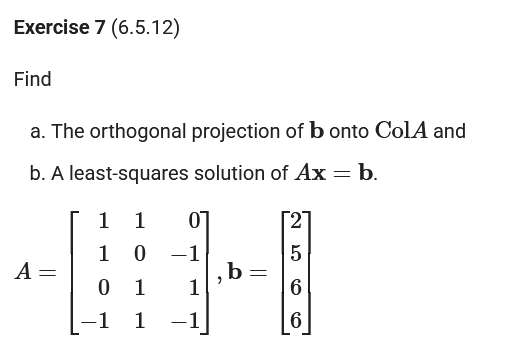

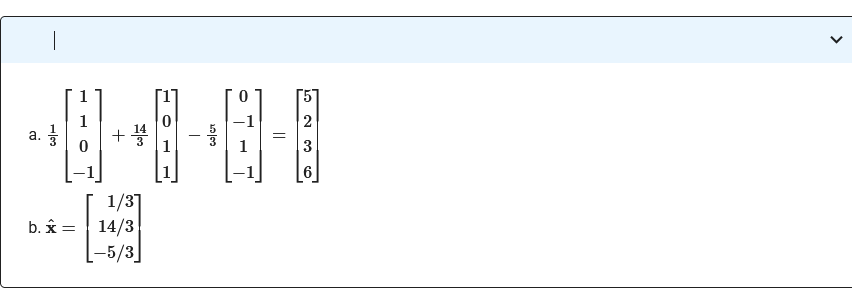

In [12]:
##6.5.12
A = Matrix(([1,1,0],[1,0,-1],[0,1,1],[-1,1,-1]))
b = Matrix(([2],[5],[6],[6]))

a = Matrix.hstack(A.T*A,A.T*b).rref()[0]
num_columns = a.shape[1]

print(a)
xhat = a[:, 3]
bhat = A* xhat
print(bhat)


Matrix([[1, 0, 0, 1/3], [0, 1, 0, 14/3], [0, 0, 1, -5/3]])
Matrix([[5], [2], [3], [6]])


# 6.5.25



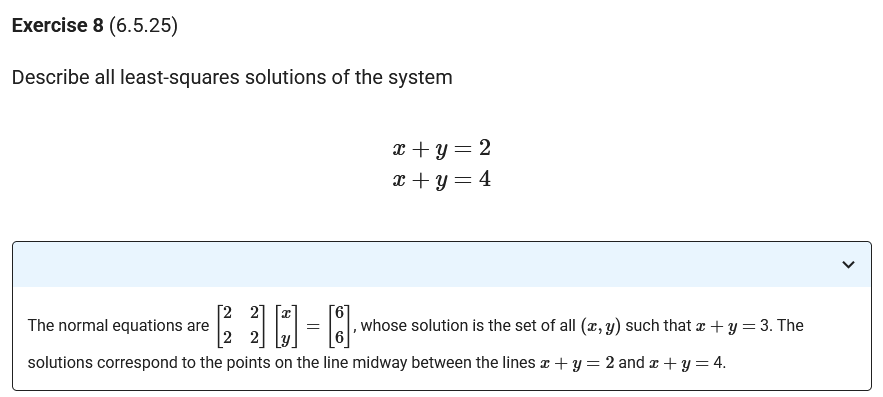

In [13]:
A = Matrix(([1,1], [1,1]))
b= Matrix(([2,4]))

a = Matrix.hstack(A.T*A,A.T*b).rref()[0]
num_columns = a.shape[1]

xhat = a[:, 2]
print(xhat)
bhat = A* xhat
print(bhat)

Matrix([[3], [0]])
Matrix([[3], [3]])


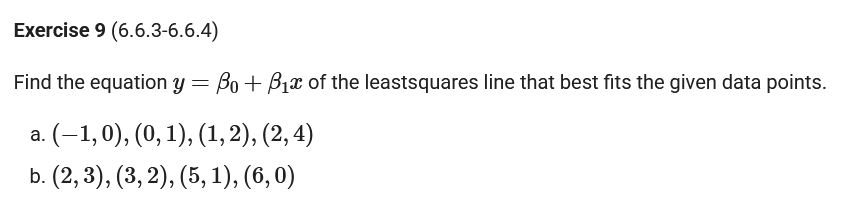

In [14]:
def fit_least_squares_line(points):
    # Split the points into x and y values
    x_vals = np.array([p[0] for p in points])
    y_vals = np.array([p[1] for p in points])

    # Construct matrix A with a column of 1s and x-values
    A = np.column_stack((np.ones_like(x_vals), x_vals))

    # Solve the least squares problem: A @ beta ≈ y
    beta, *_ = np.linalg.lstsq(A, y_vals, rcond=None)

    beta0, beta1 = beta
    return beta0, beta1

# Part a
points_a = [(-1, 0), (0, 1), (1, 2), (2, 4)]
beta0_a, beta1_a = fit_least_squares_line(points_a)

# Part b
points_b = [(2, 3), (3, 2), (5, 1), (6, 0)]
beta0_b, beta1_b = fit_least_squares_line(points_b)

beta0_a, beta1_a, beta0_b, beta1_b

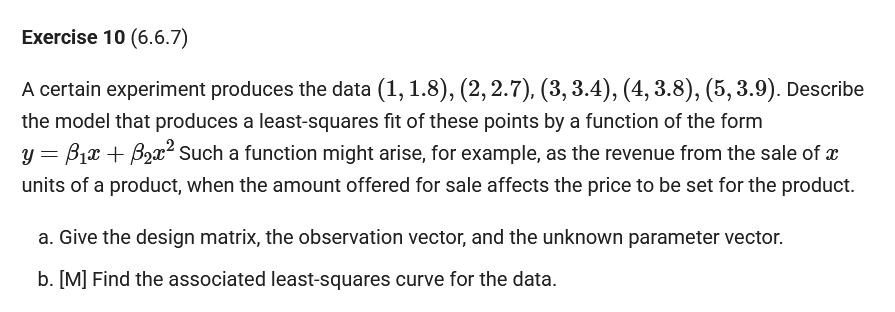

In [16]:

# Design matrix X with columns [x, x^2]
X = sp.Matrix([[x, x**2] for x in x_vals])

# Observation vector y
y = sp.Matrix(y_vals)

# Solve normal equations: (XᵀX)β = Xᵀy
beta_hat = (X.T * X).inv() * (X.T * y)

# Final equation
b1, b2 = beta_hat.evalf()
print(f"y = {b1:.2f}x + ({b2:.2f})x^2")


y = 1.76x + (-0.20)x^2


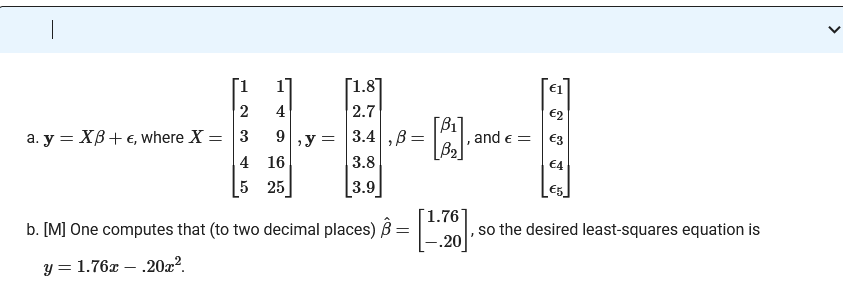

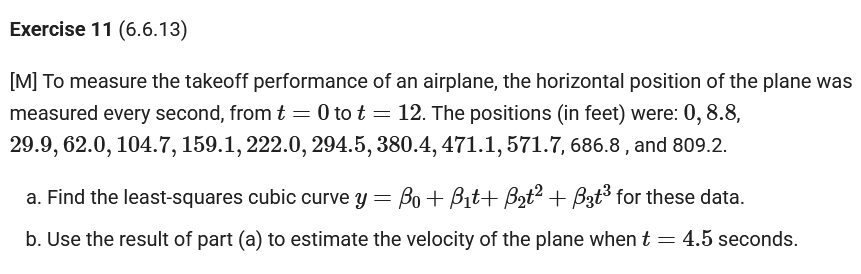

In [17]:
t_vals = list(range(13))  # t = 0 to 12
y_vals = [0, 8.8, 29.9, 62.0, 104.7, 159.1, 222.0,
          294.5, 380.4, 471.1, 571.7, 686.8, 809.2]

# Step 2: Build design matrix X for cubic model: [1, t, t^2, t^3]
X = sp.Matrix([[1, t, t**2, t**3] for t in t_vals])
y = sp.Matrix(y_vals)

# Step 3: Solve normal equations (XᵀX)β = Xᵀy
beta_hat = (X.T * X).inv() * (X.T * y)

# Step 4: Build symbolic position function y(t)
t = sp.Symbol('t')
b0, b1, b2, b3 = beta_hat
y_t = b0 + b1*t + b2*t**2 + b3*t**3

# Step 5: Differentiate to get velocity, and evaluate at t = 4.5
v_t = sp.diff(y_t, t)
velocity_at_4_5 = v_t.subs(t, 4.5)

# Step 6: Print results
print("Cubic equation:")
sp.pprint(y_t.simplify(), use_unicode=True)

print("\nVelocity function:")
sp.pprint(v_t.simplify(), use_unicode=True)

print(f"\nEstimated velocity at t = 4.5 sec: {velocity_at_4_5.evalf():.2f} ft/sec")

Cubic equation:
                      3                     2                                 
- 0.0273601398601215⋅t  + 5.55536963036866⋅t  + 4.70248501498645⋅t - 0.8557692

        
30769511

Velocity function:
                      2                                        
- 0.0820804195803646⋅t  + 11.1107392607373⋅t + 4.70248501498645

Estimated velocity at t = 4.5 sec: 53.04 ft/sec


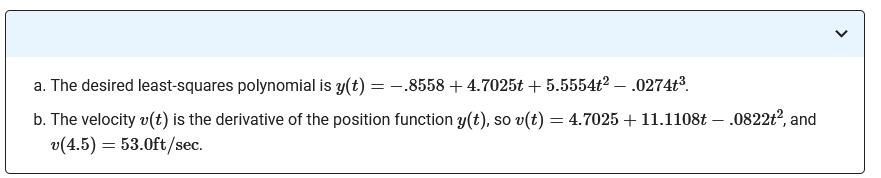